# U.S. Medical Insurance Costs

Columns are:
age, sex, bmi, children, smoker, region, charges
In the form of:
int, string (male/female), float, int, string (no/yes), string (southwest/northwest), float

#1 & #2 Import as pandas dataframe and clean up data by transforming sex and smoker column into boolean or 0 and 1

#3 Possible things to investigate
Average Age, insurance cost and bmi
Average insurance cost for certain age ranges: 18 - 24, 25 - 32, 33 - 40, 41 - 50, 51 - 60, etc.
Visualise this data in a bar chart.
Same for insurance cost by sex and region

Return with better understanding of matplotlib

In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt

insurance_data = pd.read_csv("insurance.csv")

print(insurance_data.head())

# Make sex and smoker into 0 and 1 column

value_map = {'male': 0, 'female': 1, 'no': 0, 'yes': 1}
insurance_data['sex'] = insurance_data['sex'].map(value_map)
insurance_data['smoker'] = insurance_data['smoker'].map(value_map)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
print("The average age of people in the dataset is", round(insurance_data["age"].mean(), 2), "years old")
print("The average BMI of people in the dataset is", round(insurance_data["bmi"].mean(), 2))
print("The average amount of children of people in the dataset is", round(insurance_data["children"].mean(), 2))
print("The average insurance charge of people in the dataset is {0}$".format(round(insurance_data["charges"].mean(), 2)))
print("{0}% of the people in the dataset are smokers".format(round(insurance_data["smoker"].mean() * 100, 2)))

The average age of people in the dataset is 39.21 years old
The average BMI of people in the dataset is 30.66
The average amount of children of people in the dataset is 1.09
The average insurance charge of people in the dataset is 13270.42$
20.48% of the people in the dataset are smokers


      age  sex     bmi  children  smoker     region      charges
0      19    1  27.900         0       1  southwest  16884.92400
1      18    0  33.770         1       0  southeast   1725.55230
12     23    0  34.400         0       0  southwest   1826.84300
15     19    0  24.600         1       0  southwest   1837.23700
17     23    0  23.845         0       0  northeast   2395.17155
...   ...  ...     ...       ...     ...        ...          ...
1328   23    1  24.225         2       0  northeast  22395.74424
1331   23    1  33.400         0       0  southwest  10795.93733
1334   18    1  31.920         0       0  northeast   2205.98080
1335   18    1  36.850         0       0  southeast   1629.83350
1336   21    1  25.800         0       0  southwest   2007.94500

[278 rows x 7 columns]
     age  sex   bmi  children  smoker     region      charges
0     19    1  27.9         0       1  southwest  16884.92400
1     23    0  34.4         0       0  southwest   1826.84300
2     19  

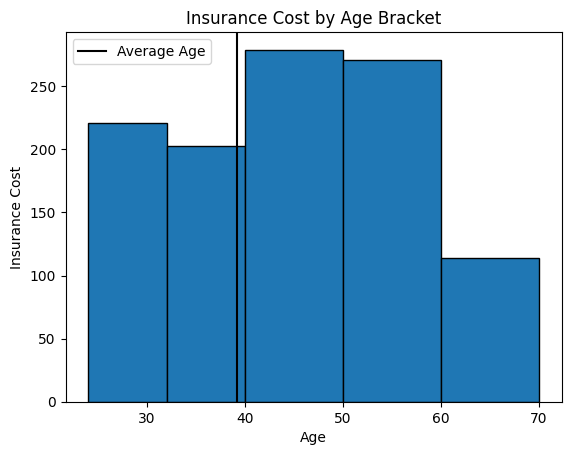

In [25]:
def cost_by_age(df):
    age_brackets = {
        "18 - 24": (18, 24),
        "25 - 32": (25, 32),
        "33 - 40": (33, 40),
        "41 - 50": (41, 50),
        "51 - 60": (51, 60),
        "61 - 70": (61, 70)
        }
    age_bins = [24, 32, 40, 50, 60, 70]
    
    # bins = [age_brackets[bracket][0] for bracket in age_brackets.values()]
    to24 = df[df.age < 25]
    print(to24)
    southwests = df[df.region == "southwest"]
    southwests.reset_index(inplace = True, drop = True)
    print(southwests)
    regions = df.groupby("region").charges.count().reset_index()
    print(regions)
    regions_smoker = df.groupby(["region", "smoker"]).charges.count().reset_index()
    print(regions_smoker)
    smoker_regions = regions_smoker.pivot(columns = "smoker", index = "region", values = "charges").reset_index()
    print(smoker_regions)

    plt.hist(df["age"], age_bins, edgecolor = "black")
    plt.axvline(round(insurance_data["age"].mean(), 2), color = "black", label = "Average Age")
    plt.xlabel("Age")
    plt.ylabel("Insurance Cost")
    plt.title("Insurance Cost by Age Bracket")
    plt.legend()
    plt.show()


cost_by_age(insurance_data)